In [1]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [2]:
# import dataset
data=pd.read_csv("C:/Users/Shubham Tiwari/Downloads/forestfires.csv")

In [3]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Performing EDA 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.shape

(517, 31)

In [6]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
dataz=data.copy()

In [9]:
dataz

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
dataz[dataz.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In this dataset very few duplicate values, it may not effect major on prediction.

In [11]:
dataz["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [12]:
dataz["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [13]:
dataz=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]

In [14]:
dataz

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [15]:
corr=dataz.corr()

In [16]:
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


# Visualization on dataset

<AxesSubplot:>

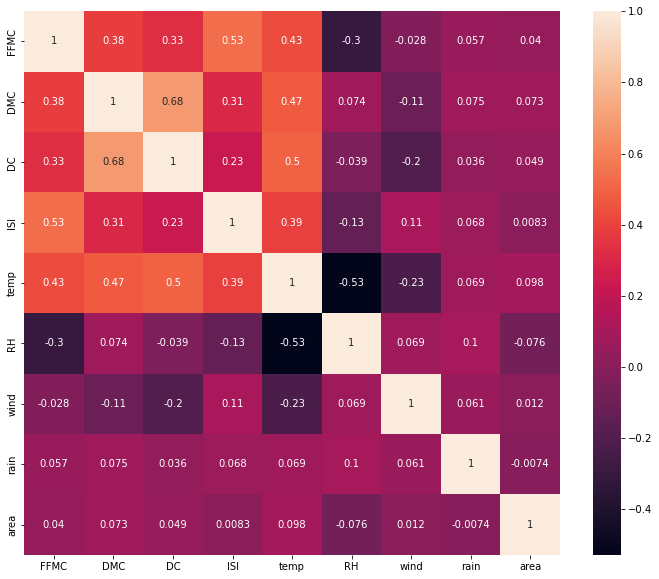

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

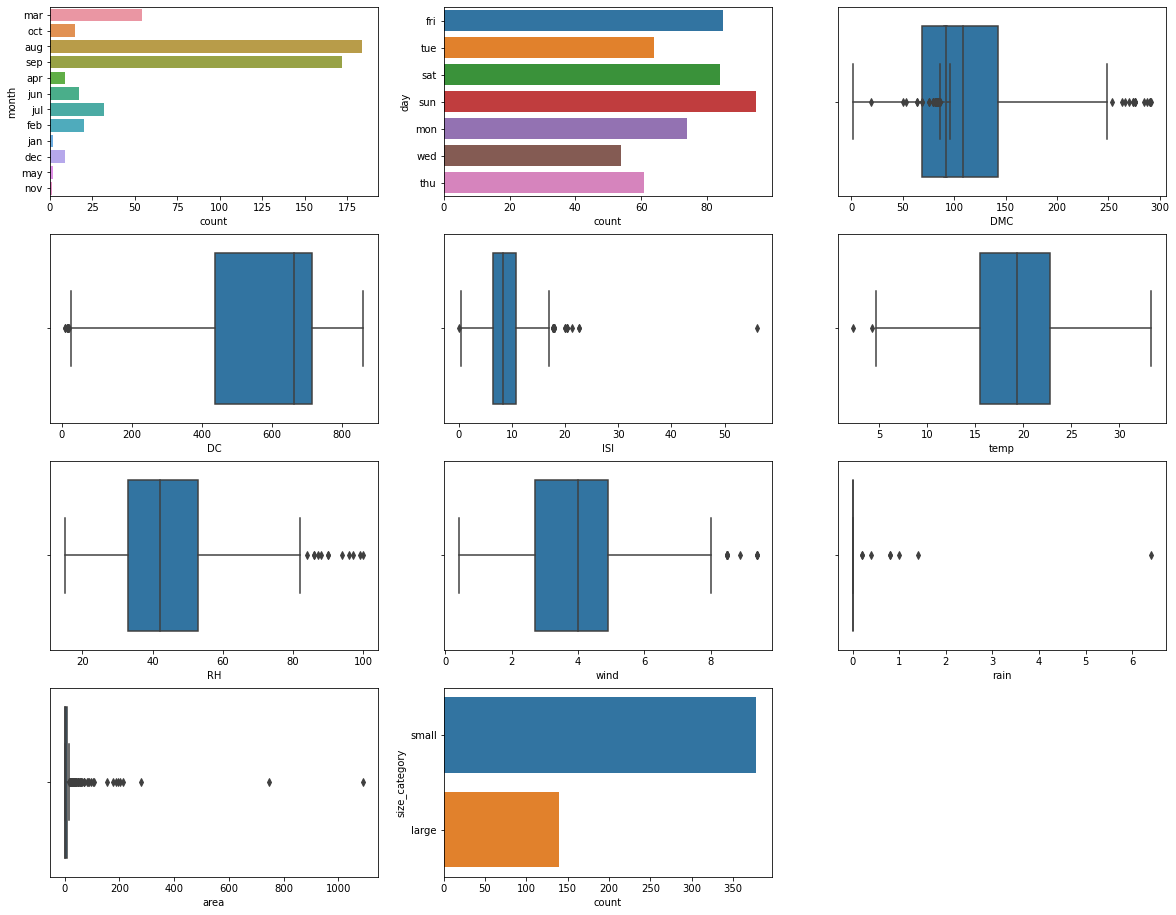

In [18]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=dataz, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=dataz, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=dataz["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=dataz["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=dataz["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=dataz["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=dataz["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=dataz["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=dataz["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=dataz["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=dataz["area"])]

[plt.subplot(4,3,11), sns.countplot(data=dataz, y='size_category')];

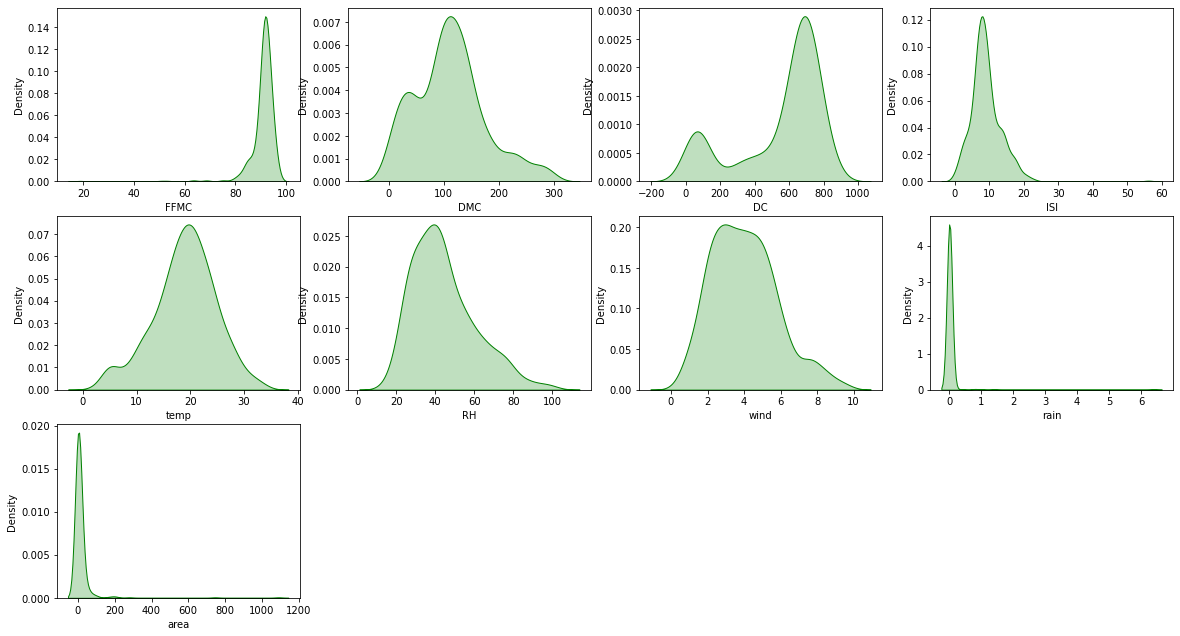

In [19]:
no_columns = dataz.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(dataz[column],color='g',shade=True)

Text(0, 0.5, 'Rate')

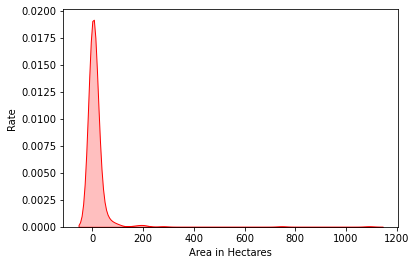

In [20]:
sns.kdeplot(dataz['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

Mostly area less than 200 hecters

### Histogram And Boxplot

([<AxesSubplot:title={'center':'v'}>,
  <AxesSubplot:title={'center':'v'}>,
  Text(0.5, 1.0, 'v')],
 [<AxesSubplot:xlabel='FFMC'>, <AxesSubplot:xlabel='FFMC'>])

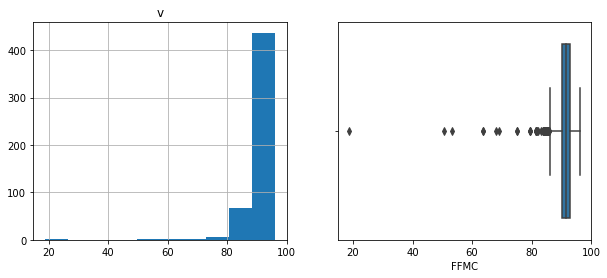

In [21]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["FFMC"])]

([<AxesSubplot:title={'center':'DMC'}>,
  <AxesSubplot:title={'center':'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<AxesSubplot:xlabel='DMC'>, <AxesSubplot:xlabel='DMC'>])

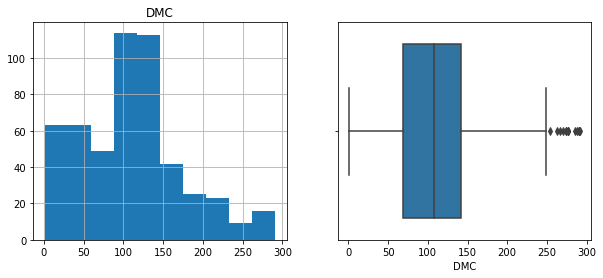

In [22]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["DMC"])]

([<AxesSubplot:title={'center':'DC'}>,
  <AxesSubplot:title={'center':'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<AxesSubplot:xlabel='DC'>, <AxesSubplot:xlabel='DC'>])

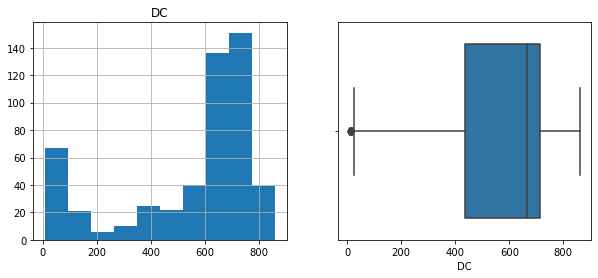

In [23]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["DC"])]

([<AxesSubplot:title={'center':'ISI'}>,
  <AxesSubplot:title={'center':'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<AxesSubplot:xlabel='ISI'>, <AxesSubplot:xlabel='ISI'>])

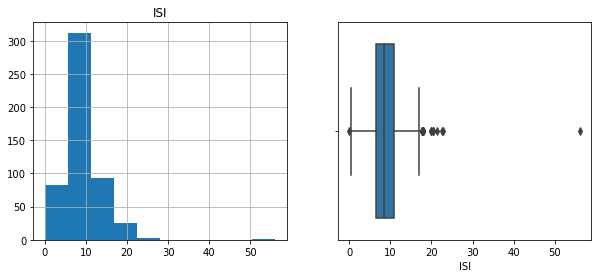

In [24]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["ISI"])]

([<AxesSubplot:title={'center':'temp'}>,
  <AxesSubplot:title={'center':'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<AxesSubplot:xlabel='temp'>, <AxesSubplot:xlabel='temp'>])

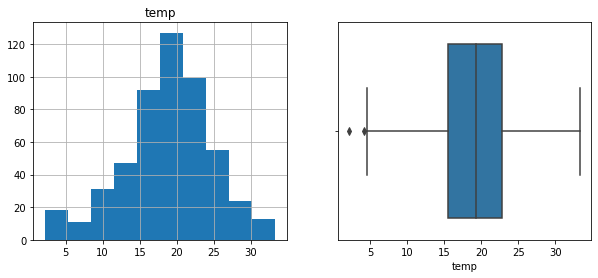

In [25]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["temp"])]

([<AxesSubplot:title={'center':'RH'}>,
  <AxesSubplot:title={'center':'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<AxesSubplot:xlabel='RH'>, <AxesSubplot:xlabel='RH'>])

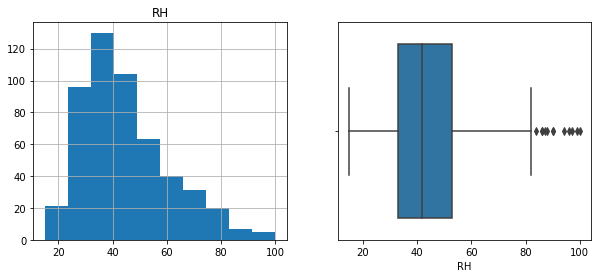

In [26]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["RH"])]

([<AxesSubplot:title={'center':'wind'}>,
  <AxesSubplot:title={'center':'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<AxesSubplot:xlabel='wind'>, <AxesSubplot:xlabel='wind'>])

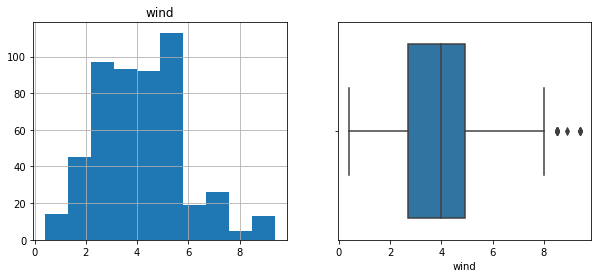

In [27]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["wind"])]

([<AxesSubplot:title={'center':'rain'}>,
  <AxesSubplot:title={'center':'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<AxesSubplot:xlabel='rain'>, <AxesSubplot:xlabel='rain'>])

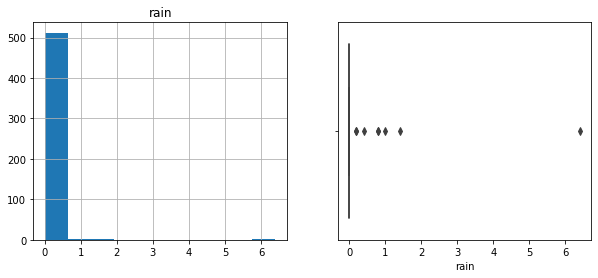

In [28]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["rain"])]

([<AxesSubplot:title={'center':'area'}>,
  <AxesSubplot:title={'center':'area'}>,
  Text(0.5, 1.0, 'area')],
 [<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>])

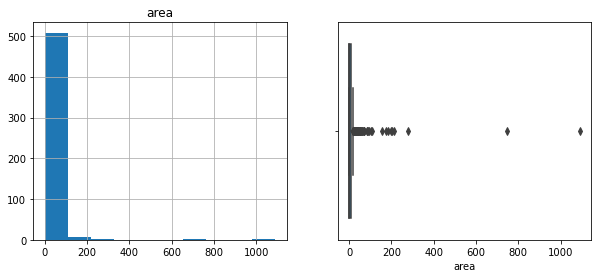

In [29]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["area"])]

In [30]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])

In [31]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
x=data.iloc[:,2:11]
y=data["size_category"]

In [33]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [35]:
seed=9
np.random.seed(seed)

In [36]:
model=Sequential()
model.add(Dense(12,input_dim=9,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [37]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model

In [38]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 22ms/step - loss: 23.2157 - accuracy: 0.2428 - val_loss: 12.5510 - val_accuracy: 0.3450
Epoch 2/250
35/35 [==============================] - 0s 7ms/step - loss: 7.2714 - accuracy: 0.3584 - val_loss: 3.4135 - val_accuracy: 0.4620
Epoch 3/250
35/35 [==============================] - 0s 7ms/step - loss: 1.0043 - accuracy: 0.6734 - val_loss: 1.4106 - val_accuracy: 0.5731
Epoch 4/250
35/35 [==============================] - 0s 7ms/step - loss: 0.6718 - accuracy: 0.7572 - val_loss: 1.1752 - val_accuracy: 0.5848
Epoch 5/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5894 - accuracy: 0.7803 - val_loss: 1.0480 - val_accuracy: 0.5906
Epoch 6/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5518 - accuracy: 0.8121 - val_loss: 0.9882 - val_accuracy: 0.5789
Epoch 7/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5316 - accuracy: 0.8179 - val_loss: 0.8981 - val_accuracy: 0.5965
Epoch 8/25

In [39]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9942 - val_loss: 0.3155 - val_accuracy: 0.9181
Epoch 2/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0179 - accuracy: 0.9913 - val_loss: 0.3985 - val_accuracy: 0.9123
Epoch 3/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.2732 - val_accuracy: 0.9240
Epoch 4/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.4277 - val_accuracy: 0.9064
Epoch 5/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.3390 - val_accuracy: 0.9181
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9942 - val_loss: 0.3511 - val_accuracy: 0.9181
Epoch 7/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9942 - val_loss: 0.3398 - val_accuracy: 0.9181
Epoch 8/250
3

Loss=0.0796 and Accuracy=97.49%

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
# Visualzation of Training History

fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
fil_model.history['accuracy'] 

[0.9942196607589722,
 0.9913294911384583,
 0.9971098303794861,
 0.9942196607589722,
 0.9942196607589722,
 0.9942196607589722,
 0.9942196607589722,
 0.9971098303794861,
 0.9942196607589722,
 0.9942196607589722,
 0.9913294911384583,
 0.9855491518974304,
 0.9884393215179443,
 0.9971098303794861,
 0.9971098303794861,
 0.9971098303794861,
 0.9942196607589722,
 0.9942196607589722,
 0.9884393215179443,
 0.9855491518974304,
 0.9942196607589722,
 0.9913294911384583,
 0.9942196607589722,
 0.9913294911384583,
 0.9913294911384583,
 0.9913294911384583,
 0.9913294911384583,
 0.9855491518974304,
 0.9942196607589722,
 0.9942196607589722,
 0.9884393215179443,
 0.9971098303794861,
 0.9942196607589722,
 0.9913294911384583,
 0.9971098303794861,
 0.9971098303794861,
 0.97398841381073,
 0.9971098303794861,
 0.9942196607589722,
 0.9768785834312439,
 0.9855491518974304,
 0.9942196607589722,
 0.9942196607589722,
 0.9913294911384583,
 0.9942196607589722,
 0.9971098303794861,
 0.9971098303794861,
 0.997109830379

In [43]:
fil_model.history['val_accuracy']

[0.9181286692619324,
 0.9122806787490845,
 0.9239766001701355,
 0.9064327478408813,
 0.9181286692619324,
 0.9181286692619324,
 0.9181286692619324,
 0.9181286692619324,
 0.9239766001701355,
 0.9181286692619324,
 0.9181286692619324,
 0.9181286692619324,
 0.9181286692619324,
 0.9298245906829834,
 0.9239766001701355,
 0.9064327478408813,
 0.9122806787490845,
 0.9239766001701355,
 0.9064327478408813,
 0.9239766001701355,
 0.9239766001701355,
 0.9239766001701355,
 0.9181286692619324,
 0.9181286692619324,
 0.9122806787490845,
 0.9239766001701355,
 0.9181286692619324,
 0.9064327478408813,
 0.9181286692619324,
 0.9122806787490845,
 0.9122806787490845,
 0.9181286692619324,
 0.9181286692619324,
 0.9122806787490845,
 0.9122806787490845,
 0.9239766001701355,
 0.9122806787490845,
 0.9122806787490845,
 0.9298245906829834,
 0.9122806787490845,
 0.9239766001701355,
 0.9122806787490845,
 0.9239766001701355,
 0.9181286692619324,
 0.9181286692619324,
 0.9181286692619324,
 0.9181286692619324,
 0.9181286692

In [44]:
fil_model.history['loss'] 

[0.01355699822306633,
 0.01794743910431862,
 0.009971998631954193,
 0.016794774681329727,
 0.01926475390791893,
 0.013915562070906162,
 0.011535157449543476,
 0.011245000176131725,
 0.015900935977697372,
 0.015538984909653664,
 0.019065016880631447,
 0.021682962775230408,
 0.02888142503798008,
 0.012216959148645401,
 0.013940375298261642,
 0.009814485907554626,
 0.01893612928688526,
 0.010905376635491848,
 0.026368945837020874,
 0.03438911214470863,
 0.014814279973506927,
 0.02308834344148636,
 0.015560959465801716,
 0.01714353822171688,
 0.029607806354761124,
 0.01834898255765438,
 0.02437485381960869,
 0.022985579445958138,
 0.013993530534207821,
 0.016708437353372574,
 0.018185092136263847,
 0.008895049802958965,
 0.01440859492868185,
 0.021903883665800095,
 0.013448568060994148,
 0.010923062451183796,
 0.06503419578075409,
 0.011754670180380344,
 0.022903569042682648,
 0.07757388055324554,
 0.024145865812897682,
 0.018176274374127388,
 0.015667980536818504,
 0.019837133586406708,
 

In [45]:
fil_model.history['val_loss']

[0.31551095843315125,
 0.3985433876514435,
 0.2731713056564331,
 0.4277406334877014,
 0.3390290141105652,
 0.35108819603919983,
 0.3398221433162689,
 0.32530295848846436,
 0.3004867434501648,
 0.37000298500061035,
 0.3294062912464142,
 0.3233731687068939,
 0.3204193115234375,
 0.276788592338562,
 0.311992883682251,
 0.323912650346756,
 0.36322087049484253,
 0.33057600259780884,
 0.3393499255180359,
 0.2894500494003296,
 0.28633230924606323,
 0.29808250069618225,
 0.3435986042022705,
 0.3810567557811737,
 0.43150830268859863,
 0.3157186806201935,
 0.38596010208129883,
 0.5252154469490051,
 0.42101502418518066,
 0.4432133138179779,
 0.4299691617488861,
 0.3753051459789276,
 0.35883593559265137,
 0.41419705748558044,
 0.36839455366134644,
 0.35107460618019104,
 0.43093717098236084,
 0.40211179852485657,
 0.32576581835746765,
 0.3003024458885193,
 0.274308979511261,
 0.3775668740272522,
 0.3121807277202606,
 0.30713605880737305,
 0.3109225332736969,
 0.31161466240882874,
 0.340144634246826

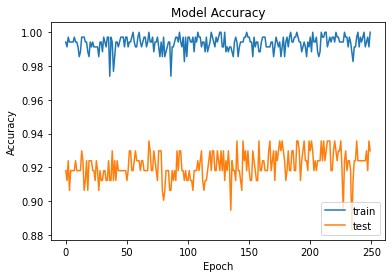

In [46]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

As per graphs, Accuracy on train and test both are almost parallel to each other.

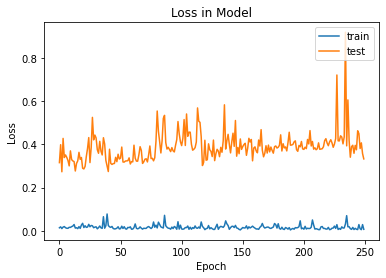

In [47]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Here in this graphs Test line completely overlap on tha Train line, it's look like similar

In [48]:
predictions = model.predict(x)

17/17 [==============================] - 0s 2ms/step


### Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [49]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [50]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [51]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])


In [52]:
# Fit the model
# Change ephocs from 250 to 200

fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 2s 23ms/step - loss: 34.8318 - accuracy: 0.3324 - val_loss: 30.2960 - val_accuracy: 0.3509
Epoch 2/200
35/35 [==============================] - 0s 7ms/step - loss: 34.4204 - accuracy: 0.3324 - val_loss: 29.8722 - val_accuracy: 0.3509
Epoch 3/200
35/35 [==============================] - 0s 7ms/step - loss: 33.9984 - accuracy: 0.3324 - val_loss: 29.4404 - val_accuracy: 0.3509
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 33.5685 - accuracy: 0.3295 - val_loss: 28.9995 - val_accuracy: 0.3509
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 33.1302 - accuracy: 0.3295 - val_loss: 28.5500 - val_accuracy: 0.3509
Epoch 6/200
35/35 [==============================] - 0s 7ms/step - loss: 32.6829 - accuracy: 0.3295 - val_loss: 28.0942 - val_accuracy: 0.3509
Epoch 7/200
35/35 [==============================] - 0s 5ms/step - loss: 32.2322 - accuracy: 0.3295 - val_loss: 27.6286 - val_accuracy: 0.350

In [53]:
# Evaluating the Model

score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 4ms/step - loss: 9.3304 - accuracy: 0.5880
accuracy: 58.80%


Loss=50.5380 and Accuracy=69.83%

In [54]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fil_model2.history.keys()

(['loss', 'accuracy'],
 [9.330416679382324, 0.5880077481269836],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [55]:
fil_model2.history['accuracy'] 

[0.33236995339393616,
 0.33236995339393616,
 0.33236995339393616,
 0.32947975397109985,
 0.32947975397109985,
 0.32947975397109985,
 0.32947975397109985,
 0.32658958435058594,
 0.32658958435058594,
 0.32658958435058594,
 0.32947975397109985,
 0.32947975397109985,
 0.32658958435058594,
 0.32658958435058594,
 0.323699414730072,
 0.3208092451095581,
 0.323699414730072,
 0.32658958435058594,
 0.32947975397109985,
 0.32947975397109985,
 0.32947975397109985,
 0.32947975397109985,
 0.33236995339393616,
 0.3352601230144501,
 0.3352601230144501,
 0.338150292634964,
 0.338150292634964,
 0.338150292634964,
 0.3352601230144501,
 0.3352601230144501,
 0.33236995339393616,
 0.33236995339393616,
 0.33236995339393616,
 0.33236995339393616,
 0.33236995339393616,
 0.33236995339393616,
 0.33236995339393616,
 0.32947975397109985,
 0.32947975397109985,
 0.32658958435058594,
 0.32947975397109985,
 0.323699414730072,
 0.3179190754890442,
 0.3150289058685303,
 0.32658958435058594,
 0.32658958435058594,
 0.3323

In [56]:
fil_model2.history['val_accuracy']

[0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.34502923488616943,
 0.34502923488616943,
 0.3391812741756439,
 0.3391812741756439,
 0.3391812741756439,
 0.34502923488616943,
 0.34502923488616943,
 0.3333333432674408,
 0.3274853825569153,
 0.3274853825569153,
 0.32163742184638977,
 0.3274853825569153,
 0.32163742184638977,
 0.3040935695171356,
 0.2923976480960846,
 0.28654971718788147,
 0.2923976480960846,
 0.28070175647735596,
 0.27485379576683044,
 0.3040935695171356,
 0.31578946113586426,
 0.3742690086364746,
 0.42690059542655945,
 0.4795321524143219,
 0.4912280738353729,
 0.4912280738353729,
 0.49707603454589844,
 0.5029239654541016,
 0.5

In [57]:
fil_model.history['loss'] 

[0.01355699822306633,
 0.01794743910431862,
 0.009971998631954193,
 0.016794774681329727,
 0.01926475390791893,
 0.013915562070906162,
 0.011535157449543476,
 0.011245000176131725,
 0.015900935977697372,
 0.015538984909653664,
 0.019065016880631447,
 0.021682962775230408,
 0.02888142503798008,
 0.012216959148645401,
 0.013940375298261642,
 0.009814485907554626,
 0.01893612928688526,
 0.010905376635491848,
 0.026368945837020874,
 0.03438911214470863,
 0.014814279973506927,
 0.02308834344148636,
 0.015560959465801716,
 0.01714353822171688,
 0.029607806354761124,
 0.01834898255765438,
 0.02437485381960869,
 0.022985579445958138,
 0.013993530534207821,
 0.016708437353372574,
 0.018185092136263847,
 0.008895049802958965,
 0.01440859492868185,
 0.021903883665800095,
 0.013448568060994148,
 0.010923062451183796,
 0.06503419578075409,
 0.011754670180380344,
 0.022903569042682648,
 0.07757388055324554,
 0.024145865812897682,
 0.018176274374127388,
 0.015667980536818504,
 0.019837133586406708,
 

In [58]:
fil_model.history['val_loss']

[0.31551095843315125,
 0.3985433876514435,
 0.2731713056564331,
 0.4277406334877014,
 0.3390290141105652,
 0.35108819603919983,
 0.3398221433162689,
 0.32530295848846436,
 0.3004867434501648,
 0.37000298500061035,
 0.3294062912464142,
 0.3233731687068939,
 0.3204193115234375,
 0.276788592338562,
 0.311992883682251,
 0.323912650346756,
 0.36322087049484253,
 0.33057600259780884,
 0.3393499255180359,
 0.2894500494003296,
 0.28633230924606323,
 0.29808250069618225,
 0.3435986042022705,
 0.3810567557811737,
 0.43150830268859863,
 0.3157186806201935,
 0.38596010208129883,
 0.5252154469490051,
 0.42101502418518066,
 0.4432133138179779,
 0.4299691617488861,
 0.3753051459789276,
 0.35883593559265137,
 0.41419705748558044,
 0.36839455366134644,
 0.35107460618019104,
 0.43093717098236084,
 0.40211179852485657,
 0.32576581835746765,
 0.3003024458885193,
 0.274308979511261,
 0.3775668740272522,
 0.3121807277202606,
 0.30713605880737305,
 0.3109225332736969,
 0.31161466240882874,
 0.340144634246826

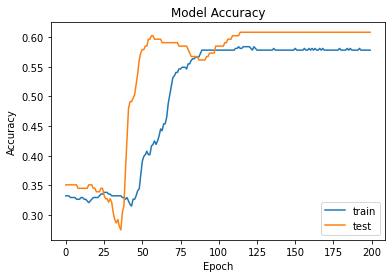

In [59]:
plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

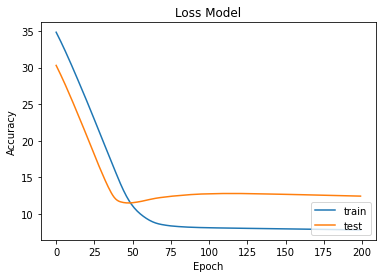

In [60]:
# summarizaion of history for loss
plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [61]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [62]:
# creating model with ["sigmoid" and "logistic"]
model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer

In [63]:
# Compile model
# chaging optimizer older=adadelta/ada, new=adagrad
model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [64]:
# Fit the model
# Change ephocs
fil_model3=model3.fit(x, y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 2s 31ms/step - loss: 0.5632 - accuracy: 0.7428 - val_loss: 0.6582 - val_accuracy: 0.6667
Epoch 2/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5588 - accuracy: 0.7457 - val_loss: 0.6582 - val_accuracy: 0.6667
Epoch 3/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5578 - accuracy: 0.7457 - val_loss: 0.6575 - val_accuracy: 0.6667
Epoch 4/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5576 - accuracy: 0.7457 - val_loss: 0.6575 - val_accuracy: 0.6667
Epoch 5/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5571 - accuracy: 0.7457 - val_loss: 0.6579 - val_accuracy: 0.6667
Epoch 6/300
24/24 [==============================] - 0s 8ms/step - loss: 0.5567 - accuracy: 0.7457 - val_loss: 0.6580 - val_accuracy: 0.6608
Epoch 7/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5563 - accuracy: 0.7457 - val_loss: 0.6583 - val_accuracy: 0.6608
Epoch 8/300


In [65]:
# Evaluating the Model
score3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.7350
accuracy: 73.50%


Loss=0.6262 and Accuracy=75.82%

In [66]:
# Visualzation of Training History, metric name and score
model3.metrics_names, score3 , fil_model3.history.keys()

(['loss', 'accuracy'],
 [0.5717511773109436, 0.7350096702575684],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

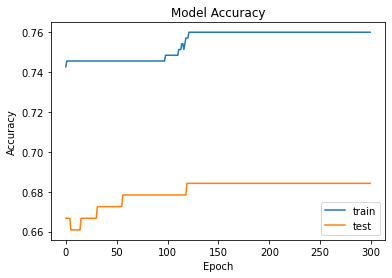

In [67]:
# summarizaion of history for accuracy
plt.plot(fil_model3.history['accuracy'])
plt.plot(fil_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

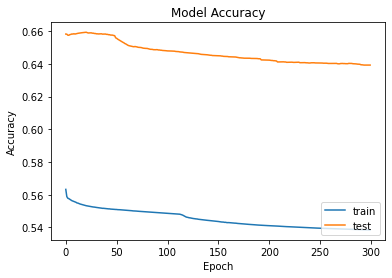

In [68]:
# summarizaion of history for loss
plt.plot(fil_model3.history['loss'])
plt.plot(fil_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### AS per calcluation "relu" activation function helping to uncrease accuracy